In [1]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

In [2]:
df = pd.read_csv('dataset2.csv')

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset2.csv'

In [11]:
df = pd.read_csv('dataset2.csv')

trace1 = go.Bar(
    x=df['diploma'],
    y=df['white'],
    name='white',  
    marker=dict(color='rgb(102,194,165)')  

)

trace2 = go.Bar(
    x=df['diploma'],
    y=df['hispanic'],
    name='hispanic',  
    marker=dict(color='rgb(106,90,205)')  

)

trace3 = go.Bar(
    x=df['diploma'],
    y=df['asian'],
    name='asian',  
    marker=dict(color='rgb(141,160,203)')

)

trace4 = go.Bar(
    x=df['diploma'],
    y=df['black'],
    name='black',  
    marker=dict(color='rgb(135,206,235)')
)

# Create a layout object that contains the specifications for the X and Y axes, and the legend
layout = go.Layout(
    title='Education level by racial groups',
    height = 400,
    xaxis=go.layout.XAxis(
        type='category',  # the type for the x axis is categorical
        title='Education Level'
    ),
    yaxis=go.layout.YAxis(
        title='Value'
    ),
    barmode='group',  # Group the bars for each category
    legend=dict(
    )
)

# Create the figure object with data and layout
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
fig.show()


FileNotFoundError: [Errno 2] No such file or directory: 'dataset2.csv'

In [12]:
dh = pd.read_csv('health.csv', delimiter=',')


trace = go.Bar(
    x=dh['pctile'],
    y=dh['ave']
)

# Create a layout object that contains the specifications for the X and Y axes, and the legend
layout = go.Layout(
    title = 'Mortality rate of income percentile',
    xaxis=go.layout.XAxis(
        type='category', # the type for the x axis is categorical
        title = 'income percentile'
    ),
    yaxis=go.layout.YAxis(
        title = 'mortality rate'
    )
)

fig = go.Figure(data=trace, layout=layout)
fig.show()

In [13]:
dp = pd.read_csv('crimerace.csv', delimiter=',')


aantal = dp['total']
race = dp['race']

fig = px.pie(
    dp,
    values = aantal,
    names = race,
    title = 'Violent crime rate across across racial groups'
)

fig.update_traces(
    textposition='outside', 
    textinfo='percent+label'
)

fig.update_layout(
    height = 600,
    showlegend = False
)

fig.show()

In [14]:
df = pd.read_csv('population.csv', delimiter=',')


aantal = df['total']
race = df['race']

fig = px.pie(
    dp,
    values = aantal,
    names = race,
    title = 'Population of the US'
)

fig.update_traces(
    textposition='outside', 
    textinfo='percent+label'
)

fig.update_layout(
    height = 600,
    showlegend = False
)

fig.show()

In [15]:
from ipywidgets import interact, Dropdown, Layout

dp = pd.read_csv('crimerace.csv', delimiter=',')
df = pd.read_csv('population.csv', delimiter=',')

def update_plot(variable):
    if variable == 'crime rate':
        data = dp
        title = 'Violent crime rate across racial groups'
    if variable == 'population':
        data = df
        title = 'Population of the US'

    values = data['total']
    names = data['race']

    fig = px.pie(
        data,
        values=values,
        names=names,
        title=title
    )

    fig.update_traces(
        textposition='outside',
        textinfo='percent+label'
    )

    fig.update_layout(
        height=600,
        showlegend=False
    )

    fig.show()

variables = ['crime rate', 'population']
dropdown = Dropdown(options=variables, value=variables[0], description='Variable:', layout=Layout(width='300px'))

interact(update_plot, variable=dropdown)


interactive(children=(Dropdown(description='Variable:', layout=Layout(width='300px'), options=('crime rate', '…

<function __main__.update_plot(variable)>

In [ ]:
dg = pd.read_csv('fatal.csv', delimiter=',')

trace = go.Bar(
    x=dg['race'],
    y=dg['freq'],
    marker=dict(color=['rgb(102,194,165)', 'rgb(135,206,235)', 'rgb(106,90,205)', 'rgb(141,160,203)'])
)

# Create a layout object that contains the specifications for the X and Y axes, and the legend
layout = go.Layout(
    title = 'Frequency police-involved fatalities by racial groups',
    xaxis=go.layout.XAxis(
        type='category', # the type for the x axis is categorical
        title = 'Racial groups'
    ),
    yaxis=go.layout.YAxis(
        title = 'Frequency police-involved fatalities'
    )
)

fig = go.Figure(data=trace, layout=layout)
fig.show()

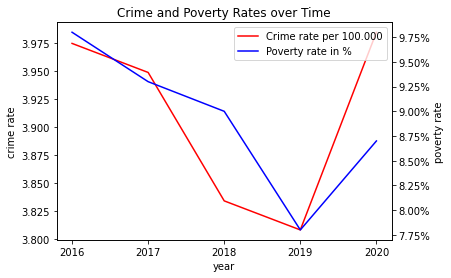

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from plotly.subplots import make_subplots

df = pd.read_csv('crime_poverty.csv')

fig, ax = plt.subplots()

ax.plot(df.year,
       df.crime,
       color="red",
       label = "Crime rate per 100.000")

ax.set_xlabel("year")
ax.set_ylabel("crime rate")

ax2=ax.twinx()

ax2.plot(df.year, 
         df["poverty"],
         color="blue",
        label = "Poverty rate in %")
ax2.set_ylabel("poverty rate")
ax2.yaxis.set_major_formatter(tick.PercentFormatter())

ax.xaxis.set_major_locator(tick.MaxNLocator(integer=True))

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best")

ax.set_title("Crime and Poverty Rates over Time")

plt.show()
